# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa as lr

# Fourier Tranformation

## DFT (Diskrete Fourier Transformation) / FFT (Fast Fourier Transform)



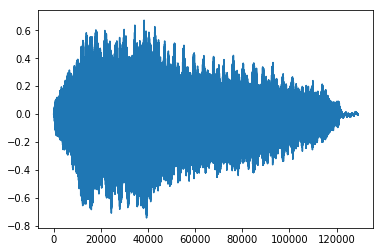

In [2]:
x, sr = lr.load('../data/violin.mp3')

display(Audio(x, rate=sr))

plt.plot(x)

Frequenz-Indices $k$: 0...$N$

$f_{\mathrm{coef}} = \frac{k \cdot sr}{N}$

Sampling Rate:  22050
Nyquist-Grenze:  11025.0
Anzahl der Frequenz-Indices:  129085
22049.829182321726


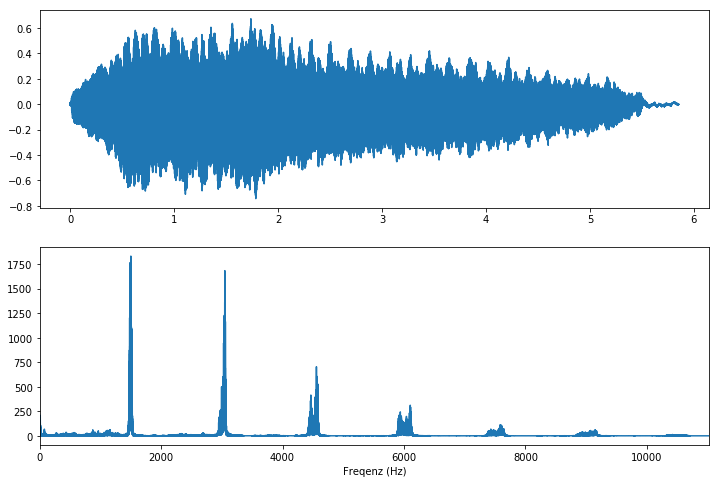

In [3]:
dft = np.fft.fft(x) # fourier coeffizienten | fft als schnelle variante der dft
# print(dft)

print('Sampling Rate: ', sr)
print('Nyquist-Grenze: ', sr / 2)

# k: 0 - 129085

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
t = np.linspace(0, np.shape(x)[0] / sr, np.shape(x)[0])
plt.plot(t, x)
plt.subplot(2, 1, 2)
N = np.shape(dft)[0]
print('Anzahl der Frequenz-Indices: ', N)
k = np.arange(N)
f = k * sr / N
print(f[-1])
plt.plot(f, np.abs(dft)) # plotten: magnitude (= absolute wert der jeweiligen komplexen zahlen)
plt.xlim(0, sr / 2)
plt.xlabel('Freqenz (Hz)')
plt.show()

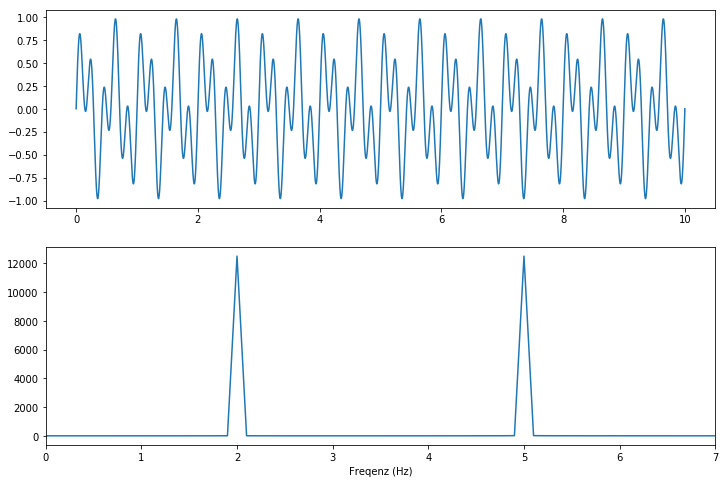

In [4]:
sr = 5000
length = 10
t = np.linspace(0, length, int(length * sr))
freq1, freq2 = 2, 5
x = np.sin(freq1 * t * 2 * np.pi) * 0.5 + np.sin(freq2 * t * 2 * np.pi) * 0.5

dft = np.fft.fft(x) # fourier coeffizienten

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
t = np.linspace(0, np.shape(x)[0] / sr, np.shape(x)[0])
plt.plot(t, x)
plt.subplot(2, 1, 2)
N = np.shape(dft)[0]
k = np.arange(N)
f = k * sr / N
plt.plot(f, np.abs(dft)) # plotten: magnitude (= absolute wert der jeweiligen komplexen zahlen)
plt.xlim(0, 7)
plt.xlabel('Freqenz (Hz)')
plt.show()

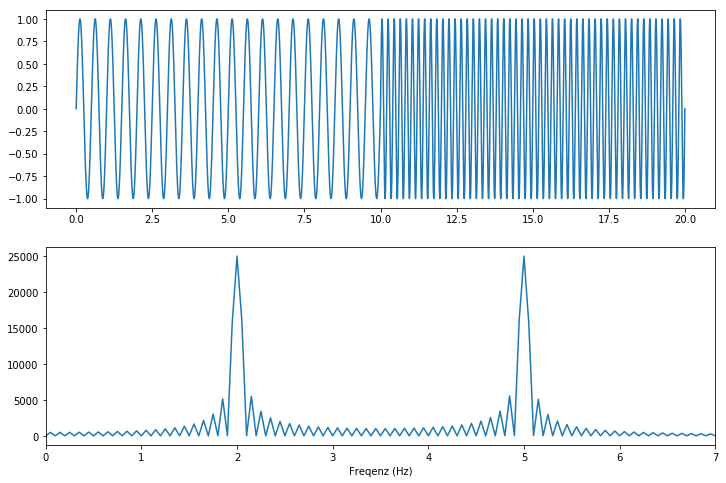

In [5]:
sr = 5000
length = 10
t = np.linspace(0, length, int(length * sr))
freq1, freq2 = 2, 5
x = np.concatenate((np.sin(freq1 * t * 2 * np.pi), np.sin(freq2 * t * 2 * np.pi)))

dft = np.fft.fft(x) # fourier coeffizienten

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
t = np.linspace(0, np.shape(x)[0] / sr, np.shape(x)[0])
plt.plot(t, x)
plt.subplot(2, 1, 2)
N = np.shape(dft)[0]
k = np.arange(N)
f = k * sr / N
plt.plot(f, np.abs(dft)) # plotten: magnitude (= absolute wert der jeweiligen komplexen zahlen)
plt.xlim(0, 7)
plt.xlabel('Freqenz (Hz)')
plt.show()



## STFT (Short Time Fourier Transformation)

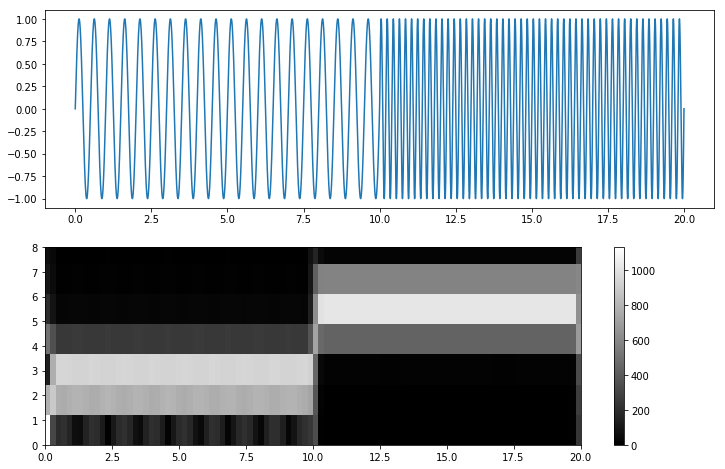

In [6]:
sr = 5000
length = 10
t = np.linspace(0, length, int(length * sr))
freq1, freq2 = 2, 5
x = np.concatenate((np.sin(freq1 * t * 2 * np.pi), np.sin(freq2 * t * 2 * np.pi)))

stft = lr.stft(x, n_fft=4096, hop_length=1024, win_length=4096)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
t = np.linspace(0, np.shape(x)[0] / sr, np.shape(x)[0])
plt.plot(t, x)
plt.subplot(2, 1, 2)
N = np.shape(dft)[0]
k = np.arange(N)
f = k * sr / N
plt.imshow(np.abs(stft), aspect='auto', origin='lower', extent=[0, length * 2, 0, sr / 2], cmap='gray')
plt.ylim(0, 8)
# plt.ylabel('Freqenz (Hz)')
plt.colorbar()
plt.show()

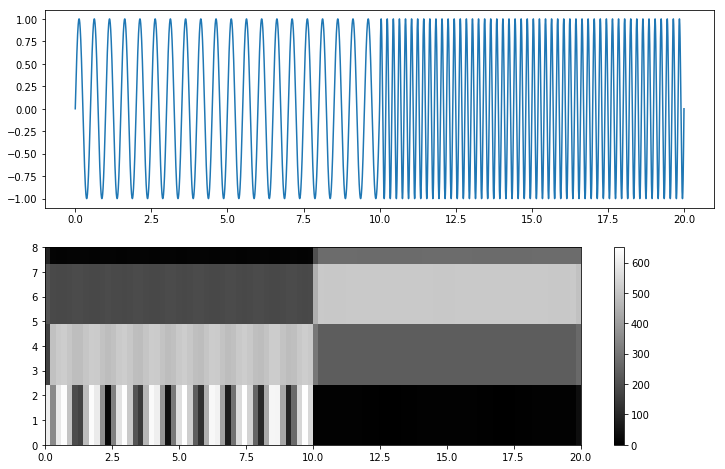

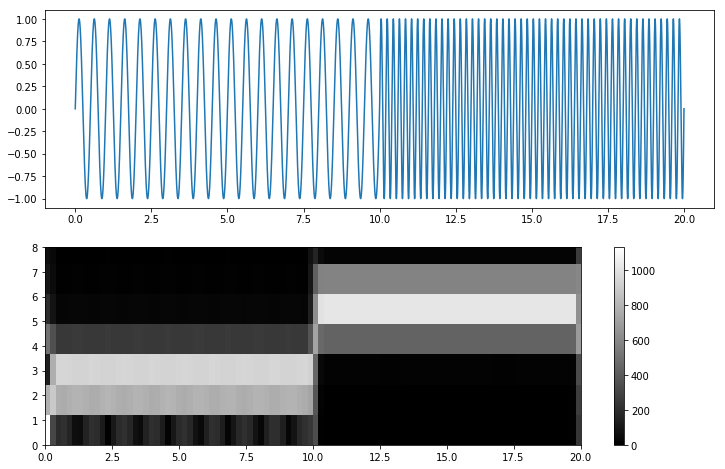

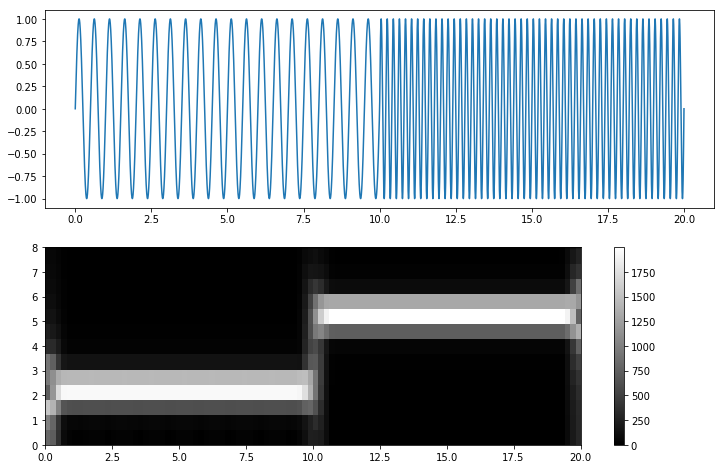

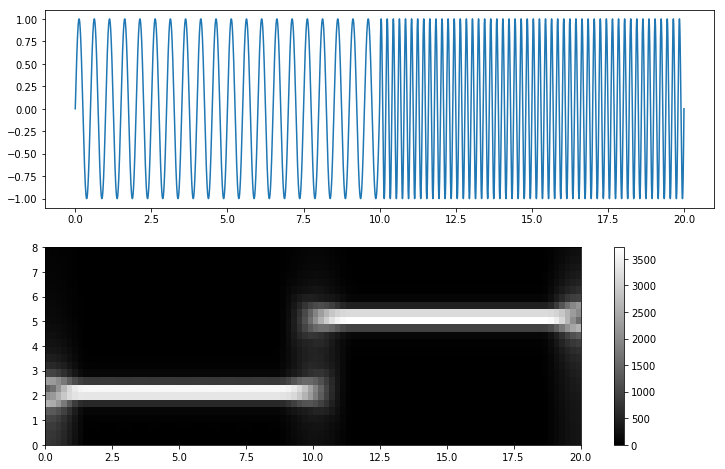

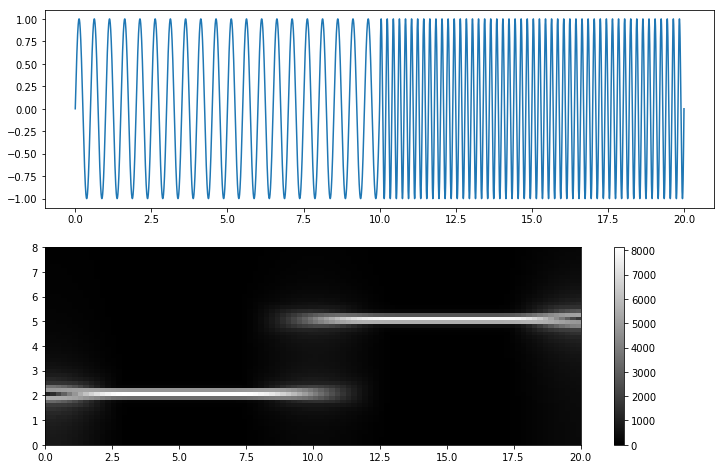

In [7]:
sr = 5000
length = 10
t = np.linspace(0, length, int(length * sr))
freq1, freq2 = 2, 5
x = np.concatenate((np.sin(freq1 * t * 2 * np.pi), np.sin(freq2 * t * 2 * np.pi)))

win_lengths = 2 ** np.array([11, 12, 13, 14, 15])

for win_length in win_lengths:
    stft = lr.stft(x, n_fft=win_length, hop_length=1024, win_length=win_length)

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    t = np.linspace(0, np.shape(x)[0] / sr, np.shape(x)[0])
    plt.plot(t, x)
    plt.subplot(2, 1, 2)
    N = np.shape(dft)[0]
    k = np.arange(N)
    f = k * sr / N
    plt.imshow(np.abs(stft), aspect='auto', origin='lower', extent=[0, length * 2, 0, sr / 2], cmap='gray')
    plt.ylim(0, 8)
    # plt.ylabel('Freqenz (Hz)')
    plt.colorbar()
    plt.show()